In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [2]:
def lorentzian(x, x0, gamma, A):
    """Calculate the Lorentzian function.
    
    Parameters:
    - x: The independent variable.
    - x0: The position of the peak.
    - gamma: The half-width at half-maximum (HWHM).
    - A: The peak height.
    """
    return A * gamma**2 / (np.pi * ((x - x0)**2 + gamma**2))

def plot_peaks(height1, height2, title):
    """
    Plots two Lorentzian peaks with given heights.
    
    Parameters:
    - height1: The height of the first peak.
    - height2: The height of the second peak.
    - title: Title of the plot
    """
    x = np.linspace(2, 4, 400)  # Independent variable range
    gamma = 0.001  # Assume a fixed HWHM for simplicity
    x0_1, x0_2 = 3.5, 2.5  # Positions of the two peaks
    
    # Calculate the Lorentzian peaks
    y1 = lorentzian(x, x0_1, gamma, height1)
    y2 = lorentzian(x, x0_2, gamma, height2)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='Peak 1 (Height = {:.2f})'.format(height1), color = 'm')
    plt.plot(x, y2, label='Peak 2 (Height = {:.2f})'.format(height2), color = 'm')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Lorentzian Function')
    plt.legend()
    plt.show()

def H_peak_simulator(rho):
    """" 
    Plots the expected Hydrogen peaks on an NMR spectrum with a state descrived by density matrix rho

    Parameters:
    - rho: A 4x4 diagonal matrix
    """
    a, b, c, d = np.diag(rho)
    plot_peaks(a-c, b-d, 'Hydrogen Frequency Spectrum')

def C_peak_simulator(rho):
    """" 
    Plots the expected Carbon peaks on an NMR spectrum with a state descrived by density matrix rho

    Parameters:
    - rho: A 4x4 diagonal matrix
    """
    a, b, c, d = np.diag(rho)
    plot_peaks(a-b, c-d, 'Carbon Frequency Spectrum')

# Question 1

### Defining Operators

In [3]:
X = 0.5 * sigmax()
Y = 0.5 * sigmay()
Z = 0.5 * sigmaz()
I = qeye(2)

II = tensor(I, I)
IX = tensor(X, I)
IY = tensor(Y, I)
IZ = tensor(Z, I)

SX = tensor(I, X)
SY = tensor(I, Y)
SZ = tensor(I, Z)
IZSZ = tensor(Z, Z) 


def R (operator, angle):
    """
    Returns a unitary to implement a roatation about the 'operator' axes with an angle 'angle'
    """
    return (-1j * angle * operator).expm()

# phase factors to add in to remove global phase
global_phase_pos = np.exp(1j * np.pi / 2)
global_phase_neg = np.exp(-1j * np.pi)

### X Gate

In [4]:

def X_gate(qubit):
    phase_pos = np.exp(1j * np.pi / 2)
    phase_neg = np.exp(-1j * np.pi)
    if qubit == 'H':
        return phase_pos * R(IX, np.pi)
    if qubit == 'C':
        return phase_pos * R(SX, np.pi)
    if qubit == 'HC':
        return phase_neg * R(IX+SX, np.pi)

### H Gate

In [5]:
def H_gate(qubit):
    phase = 1j * np.sqrt(2)
    if qubit == 'H':
        return R(IX, np.pi) * R(IY, np.pi/2) * phase
    if qubit == 'C':
        return  R(SX, np.pi) * R(SY, np.pi/2)  * phase
    if qubit == 'HC':
        return R(IX + SX, np.pi) * R(IY + SY, np.pi/2) * -2

### CZ Gate

In [6]:
def CZ_gate():
    phase = np.exp(1j * np.pi / 4)
    return R(IZ, np.pi/2) * R(SZ, np.pi/2) * R(IZSZ, -np.pi) * phase

IZ_composite = lambda angle: R(IX, np.pi/2) * R(IY, angle) * R(IX, -np.pi/2)
SZ_composite = lambda angle: R(SX, np.pi/2) * R(SY, angle) * R(SX, -np.pi/2)

def implementable_CZ():
    phase = np.exp(1j * np.pi / 4)
    return IZ_composite(np.pi/2) * SZ_composite(np.pi/2) * R(IZSZ, -np.pi) * phase
implementable_CZ()

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

### CX Gate

In [7]:
def CX_gate():
    return H_gate('C') * implementable_CZ() * H_gate('C') * 0.5

CX_gate()


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

## Summary of Results

In [8]:
print('X Gate')
print('\nX gate on H:', X_gate('H'))
print('\nX gate on C:', X_gate('C'))
print('\nX gate on HC:', X_gate('HC'))

X Gate

X gate on H: Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

X gate on C: Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

X gate on HC: Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [9]:
print('H Gate')
print('\nH gate on H:', H_gate('H'))
print('\nH gate on C:', H_gate('C'))
print('\nH gate on HC:', H_gate('HC'))

H Gate

H gate on H: Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  1.  0.]
 [ 0.  1.  0.  1.]
 [ 1.  0. -1.  0.]
 [ 0.  1.  0. -1.]]

H gate on C: Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  1.  0.  0.]
 [ 1. -1.  0.  0.]
 [ 0.  0.  1.  1.]
 [ 0.  0.  1. -1.]]

H gate on HC: Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  1.  1.  1.]
 [ 1. -1.  1. -1.]
 [ 1.  1. -1. -1.]
 [ 1. -1. -1.  1.]]


In [10]:
print('CZ Gate:\n', CZ_gate())

CZ Gate:
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]


In [11]:
print('CX gate:\n', CX_gate())

CX gate:
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


# Question 2

In [12]:
U0 = Qobj(qeye(4), dims = [[2,2], [2,2]])
U1 = Qobj(X_gate('C'), dims = [[2,2], [2,2]])
U2 = Qobj(CX_gate(), dims = [[2,2], [2,2]])
U3 = Qobj(X_gate('C') * CX_gate(), dims = [[2,2], [2,2]])

print('Uf0:\n', U0)
print('\nUf1\n:', U1)


Uf0:
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Uf1
: Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [13]:
print('\nUf2:\n', U2)
print('\nUf3:\n',U3)


Uf2:
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

Uf3:
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


# Question 3

In [14]:
# making temporal averaged thermal state

rho_thermal = Qobj( np.diag( [5,3,-3,-5] ), dims = [[2,2], [2,2]] )

P0 = II # do nothing 
P1 = R(SX,np.pi/2) * R(IZSZ,np.pi) * R(SY+IX,np.pi/2) * R(IZSZ,np.pi) * R(IY,np.pi/2)
P2 = R(IX,np.pi/2) * R(IZSZ,np.pi) * R(IY+SX,np.pi/2) * R(IZSZ,np.pi) * R(SY,np.pi/2)

rho0 = P0 * rho_thermal * P0.dag()
rho1 = P1 * rho_thermal * P1.dag()
rho2 = P2 * rho_thermal * P2.dag()

rho_temp_avg = (rho0 + rho1 + rho2)/3 + (5/3 * II)

In [25]:
P1

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.-1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.-1.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]]

In [15]:
def oracle(oracle_num):
    if oracle_num == 0:
        return H_gate('HC') * II * H_gate('HC')
    
    if oracle_num == 1:
        return H_gate('HC') * X_gate('C') * H_gate('HC')
    
    if oracle_num == 2:
        return H_gate('HC') * CX_gate() * H_gate('HC')
    
    if oracle_num == 3:
        return H_gate('HC') * CX_gate() * X_gate('C') * H_gate('HC')
    

def apply_oracle(oracle, rho):
    rho_initial = X_gate('C') * rho * X_gate('C')
    return oracle * rho_initial * oracle.dag()

In [16]:
# results
phase = 106.6666666667
print ('For constant function f0, we get the result |01> as we\'d expect\n', apply_oracle(oracle(0), rho0) / phase) 
print ('\nFor constant function f1, we get the result |01> as we\'d expect\n', apply_oracle(oracle(1), rho0) / phase)
print ('\nFor balanced function f2, we get the result |11> as we\'d expect\n', apply_oracle(oracle(2), rho0) / phase)
print ('\nFor balanced function f3, we get the result |11> as we\'d expect\n', apply_oracle(oracle(3), rho0) / phase)

For constant function f0, we get the result |01> as we'd expect
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.45  0.    0.    0.  ]
 [ 0.    0.75  0.    0.  ]
 [ 0.    0.   -0.75  0.  ]
 [ 0.    0.    0.   -0.45]]

For constant function f1, we get the result |01> as we'd expect
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.45  0.    0.    0.  ]
 [ 0.    0.75  0.    0.  ]
 [ 0.    0.   -0.75  0.  ]
 [ 0.    0.    0.   -0.45]]

For balanced function f2, we get the result |11> as we'd expect
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.45  0.    0.    0.  ]
 [ 0.   -0.45  0.    0.  ]
 [ 0.    0.   -0.75  0.  ]
 [ 0.    0.    0.    0.75]]

For balanced function f3, we get the result |11> as we'd expect
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.45  0.    0.    0.  ]

# Question 4: Grovers

In [17]:
def grovers(state):
    if state == '11':
        P = X_gate('HC') * CZ_gate() * X_gate('HC')
    if state == '10':
        P = X_gate('H') * CZ_gate() * X_gate('H')
    if state == '01':
        P = X_gate('C') * CZ_gate() * X_gate('C')
    if state == '00':
        P = CZ_gate()
        
    # G =  H * U(O) * H * P * H  this is wrong! should be H P H O
    G =  H_gate('HC') * CZ_gate() * H_gate('HC') * P * H_gate('HC') 
    return G

def apply_gates_grovers(rho, gate):
    return gate * rho * gate.dag()


In [18]:
phase = 426.66666667
print(apply_gates_grovers(rho_temp_avg, grovers('00')) / phase)
print(apply_gates_grovers(rho_temp_avg, grovers('01')) / phase)
print(apply_gates_grovers(rho_temp_avg, grovers('10')) / phase)
print(apply_gates_grovers(rho_temp_avg, grovers('11')) / phase)
print('\nWe obtain the results we expect')

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]

We obtain the results we expect


/Users/emmahughes/quantum/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/emmahughes/quantum/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


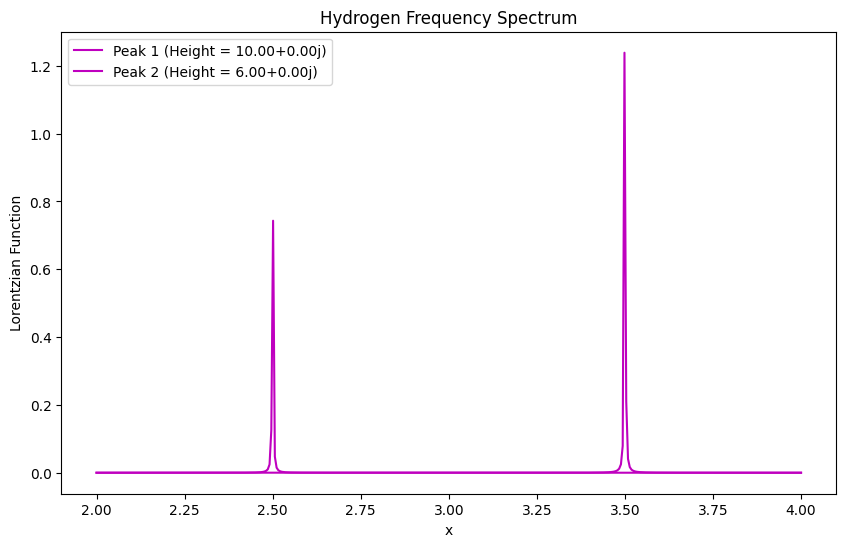

In [19]:
rho =  CX_gate() * rho_thermal * CX_gate().dag()
H_peak_simulator(rho)

In [20]:
rho0 = X_gate('C') * rho_thermal * X_gate('C').dag()
rho1 = X_gate('C') * P1 * rho_thermal * P1.dag() * X_gate('C').dag()
rho2 = X_gate('C') * P2 * rho_thermal * P2.dag() * X_gate('C').dag()

In [21]:
print(rho0, rho1, rho2)
print((rho0+rho1+rho2)/3)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 3.  0.  0.  0.]
 [ 0.  5.  0.  0.]
 [ 0.  0. -5.  0.]
 [ 0.  0.  0. -3.]] Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-5.  0.  0.  0.]
 [ 0.  5.  0.  0.]
 [ 0.  0. -3.  0.]
 [ 0.  0.  0.  3.]] Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-3.  0.  0.  0.]
 [ 0.  5.  0.  0.]
 [ 0.  0.  3.  0.]
 [ 0.  0.  0. -5.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1.66666667  0.          0.          0.        ]
 [ 0.          5.          0.          0.        ]
 [ 0.          0.         -1.66666667  0.        ]
 [ 0.          0.          0.         -1.66666667]]


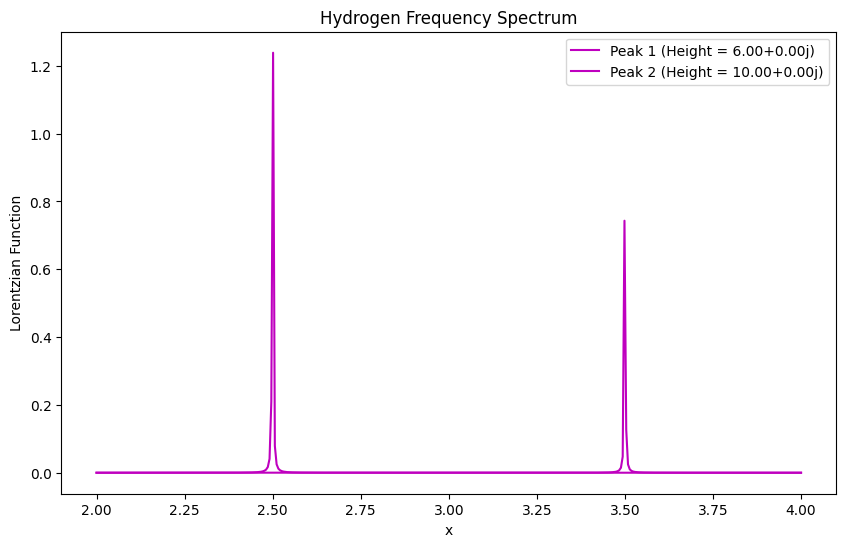

In [22]:
rho1_CX = CX_gate() * rho1 * CX_gate().dag()
H_peak_simulator(CX_gate() * rho0 * CX_gate().dag())

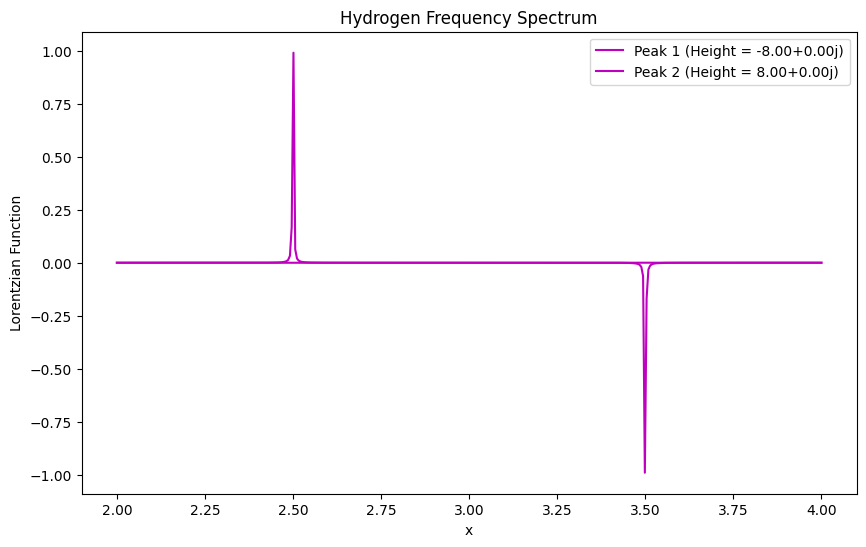

In [23]:
H_peak_simulator(CX_gate() * rho1 * CX_gate().dag())

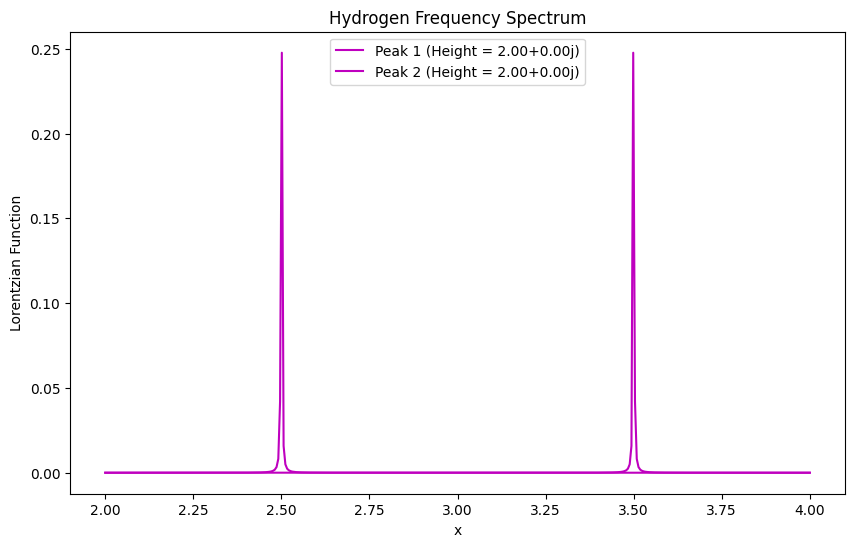

In [24]:
H_peak_simulator(CX_gate() * rho2 * CX_gate().dag())